#Clustering
Submitted by: Vedanth S Saoor (213010012)__
              Shipali (213010008)

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [22]:
#Reading the CSV file
data_cl = pd.read_csv('/content/sample_data/DataClustering.csv')
data_cl.head()

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825


Visualizing the data

(array([285.,  13.,   6.,  11.,  16.,  10.,   6.,   1.,   1.,   2.]),
 array([0.0486038 , 0.24745588, 0.44630796, 0.64516004, 0.84401212,
        1.04286421, 1.24171629, 1.44056837, 1.63942045, 1.83827253,
        2.03712462]),
 <a list of 10 Patch objects>)

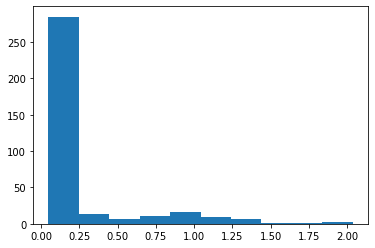

In [23]:
plt.hist(data_cl.x1)

(array([225.,   7.,  19.,  38.,  29.,  11.,  15.,   5.,   1.,   1.]),
 array([0.04702203, 0.28993167, 0.53284131, 0.77575095, 1.01866059,
        1.26157023, 1.50447986, 1.7473895 , 1.99029914, 2.23320878,
        2.47611842]),
 <a list of 10 Patch objects>)

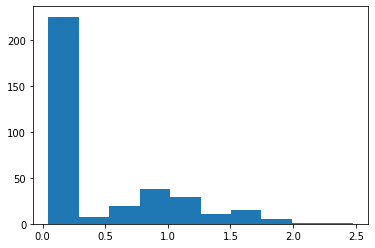

In [24]:
plt.hist(data_cl.x2)

(array([270.,  34.,  21.,  10.,   6.,   3.,   3.,   1.,   1.,   2.]),
 array([ 0.36771718,  1.59450397,  2.82129076,  4.04807754,  5.27486433,
         6.50165112,  7.7284379 ,  8.95522469, 10.18201148, 11.40879826,
        12.63558505]),
 <a list of 10 Patch objects>)

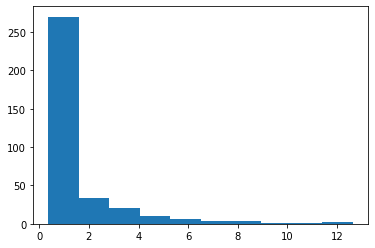

In [25]:
plt.hist(data_cl.x3)

(array([127., 137.,  43.,  19.,  16.,   5.,   2.,   0.,   1.,   1.]),
 array([0.23256175, 0.9819899 , 1.73141805, 2.48084619, 3.23027434,
        3.97970249, 4.72913063, 5.47855878, 6.22798693, 6.97741508,
        7.72684322]),
 <a list of 10 Patch objects>)

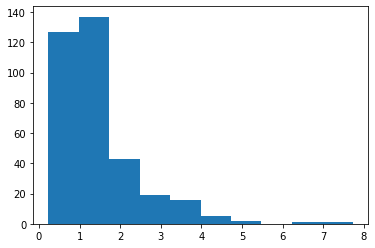

In [26]:
plt.hist(data_cl.x4)

(array([ 14.,  50., 100., 101.,  28.,   5.,   9.,  12.,  27.,   5.]),
 array([-1.31332981, -1.15109507, -0.98886033, -0.82662559, -0.66439085,
        -0.50215611, -0.33992137, -0.17768663, -0.01545188,  0.14678286,
         0.3090176 ]),
 <a list of 10 Patch objects>)

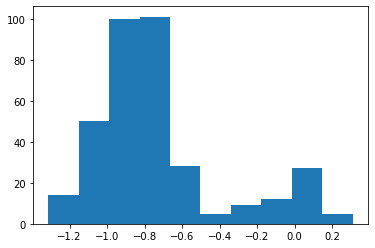

In [27]:
#Since the given data is highly skewed we try different type of transformation
#Log transformation
log_trans = np.log10(data_cl)
plt.hist(log_trans.x1)

(array([304.,  14.,  17.,   9.,   3.,   1.,   0.,   0.,   2.,   1.]),
 array([2.36232899e-03, 4.17113766e-01, 8.31865203e-01, 1.24661664e+00,
        1.66136808e+00, 2.07611951e+00, 2.49087095e+00, 2.90562239e+00,
        3.32037382e+00, 3.73512526e+00, 4.14987670e+00]),
 <a list of 10 Patch objects>)

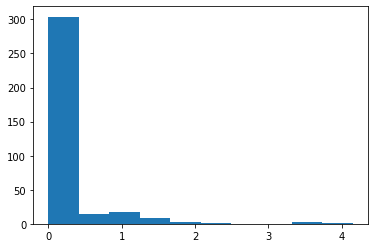

In [28]:
#power transformation
power_trans = data_cl**(2)
plt.hist(power_trans.x1)

(array([241.,  53.,   7.,   8.,  10.,  19.,   6.,   4.,   0.,   3.]),
 array([0.08045601, 0.25334211, 0.42622821, 0.59911431, 0.77200041,
        0.9448865 , 1.1177726 , 1.2906587 , 1.4635448 , 1.6364309 ,
        1.809317  ]),
 <a list of 10 Patch objects>)

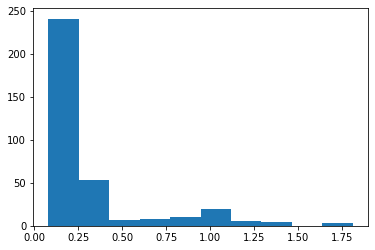

In [29]:
#Exponential transformation
power_trans = data_cl**(1/1.2)
plt.hist(power_trans.x1)

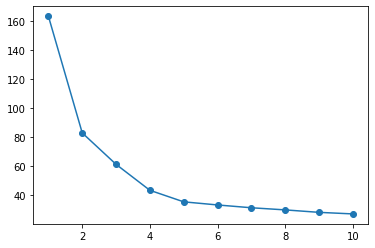

In [30]:
#It can be seen that log transformation gives distribution that is close to normal distribution we are using it for training the model
inertia = np.zeros(10)
for i in range(1,11): #number of clusters
   #Indentation
   kmeans = KMeans(n_clusters = i)
   kmeans.fit(log_trans)
   inertia[i-1] = kmeans.inertia_
   #print(inertia[i-1])
plt.plot(np.arange(1,11,1),inertia,linestyle='-',marker='o')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


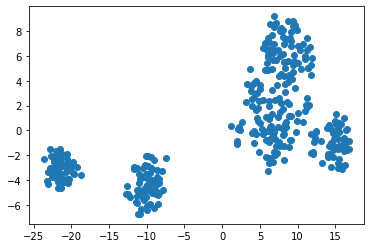

In [31]:
#t-sne Embedding 
tsne = TSNE(learning_rate = 200,perplexity = 50)
tsne_features = tsne.fit_transform(log_trans)

x = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(x,y)
#sns.scatterplot(x,y,data=data_cl)

Discussions:

Upon visualization we find out that the given data is highly skewed.

 We used different type of data transformation like logarithmic,exponential and power. It can be seen that upon logarithmic transformation we get distribution that is closer to normal distribution has compared to exponential and power transformation. 
 Therefore we have used log transformed data to determine that number of clusters. 
We have used elbow method to determine the number of clusters. Based on the plot were arrive to the conclusion that number of clusters is 5.